# REGRESSION TREE - IRIS

In [1]:
#"https://analytics4all.org/2016/11/23/r-decision-trees-regression/"

In [1]:
df=iris
head(df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [2]:
str(df)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


This dataset contains details about flowers

In [3]:
library(caTools)
sample=sample.split(df$Species,SplitRatio=0.70)
train=subset(df,sample==T)
test=subset(df,sample==F)

Warning message:
"package 'caTools' was built under R version 3.6.2"

## APPLYING REGRESSION TREE

In [4]:
library(rpart)

In [5]:
fit <- rpart(Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width+ Species,method="anova", data=train )

Our objective here is to predict Sepal length using regression

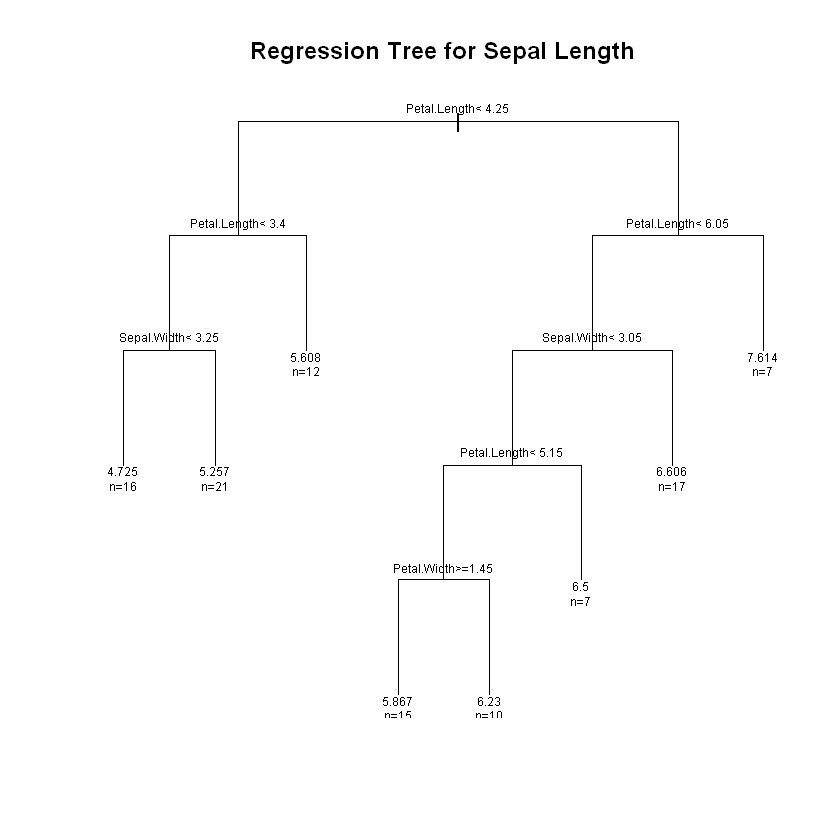

In [15]:
plot(fit,uniform=TRUE,main="Regression Tree for Sepal Length")
text(fit, use.n=TRUE, cex = 0.6)

If Petal length less than 4.25 and petal length greater than 3.4 then sepal length is 5.608

If Petal length less than 4.25 and petal length less than 3.4 and sepal width less than 3.25 then sepal length is 4.725

If Petal length less than 4.25 and petal length less than 3.4 and sepal width greater than 3.25 then sepal length is 5.257

If petal length greater than 4.25 and petal length greater than 6.05 then sepal length is 7.614

If petal length greater than 4.25 and petal length less than 6.05 and sepal width greater than 3.05 then sepal length is 6.606

If petal length greater than 4.25 and petal length less than 6.05 and sepal width less than 3.05 and petal length greater than 5.15 then sepal length is 6.5

If petal length greater than 4.25 and petal length less than 6.05 and sepal width less than 3.05 and petal length less than 5.15 and petal width less than 1.45 then sepal length is 6.23

If petal length greater than 4.25 and petal length less than 6.05 and sepal width less than 3.05 and petal length less than 5.15 and petal width greater than oe equal to 1.45 then sepal length is 5.867


Regression tree:
rpart(formula = Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + 
    Species, data = train, method = "anova")

Variables actually used in tree construction:
[1] Petal.Length Petal.Width  Sepal.Width 

Root node error: 73.321/105 = 0.69829

n= 105 

        CP nsplit rel error  xerror     xstd
1 0.587791      0   1.00000 1.02357 0.122178
2 0.146999      1   0.41221 0.42867 0.062552
3 0.041761      2   0.26521 0.29669 0.038035
4 0.035931      3   0.22345 0.28417 0.038971
5 0.035073      4   0.18752 0.29110 0.040460
6 0.017762      5   0.15244 0.24917 0.038567
7 0.010803      6   0.13468 0.23550 0.036313
8 0.010000      7   0.12388 0.22163 0.034243


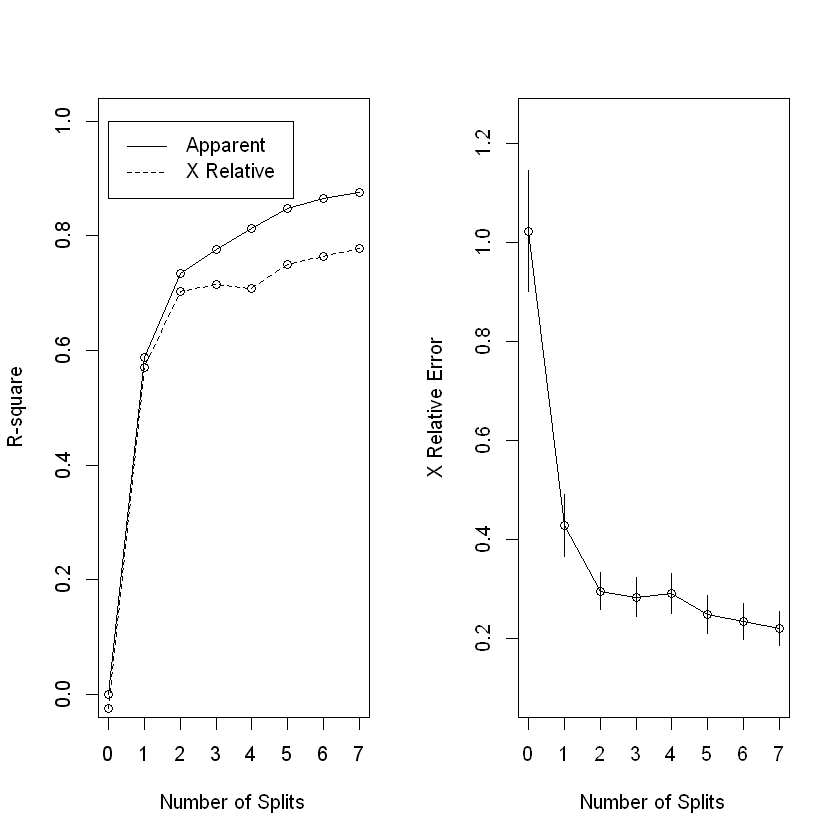

In [7]:
par(mfrow=c(1,2))
rsq.rpart(fit)

As the number of split increases R-square incrases while error decreases

This means that as number of splits increases model gets better accurracy and error in prediction

In [8]:
testData  <-data.frame (Species = 'setosa', Sepal.Width = 4, Petal.Length =1.2,Petal.Width=0.3)
predict(fit, testData, method = "anova")

1 
5.257143

passed a custom test data to find what the prediction will be

In [10]:
predictions=predict(fit,test,method='anova')
results=cbind(predictions,test$Sepal.Length)

passed down test data 30 % of the whole data to predict

In [11]:
colnames(results)<-c('pred','real')
results<-as.data.frame(results)

In [12]:
SSE=sum((results$pred-results$real)^2)
SST=sum((mean(df$Sepal.Length)-results$real)^2)
R2=1-SSE/SST
R2

[1] 0.8187382

• R-squared is a goodness-of-fit measure for linear regression models. 
• R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. 
• this model can explain more 81% of the variation.